# Getting All Labels

In [109]:
import pandas as pd
import numpy as np
import math

In [110]:
debug_flag = True

In [111]:
def calculate_top_k_score(predicted_list,actual_list,top_k):
    predicted_list_local = None
    final_score_value = 0
    iteration = min(top_k,len(predicted_list))
    for index in range(iteration):
        lcl_value = predicted_list[index]
        if lcl_value in actual_list:
            final_score_value = final_score_value + 1
    
    if debug_flag and final_score_value>0:
        print("")
        print(final_score_value)
        print("")

    return final_score_value

In [112]:
def calculate_top_k_score_dcn(predicted_list,actual_list,top_k):
    
    predicted_list_local = None
    final_score_value = 0
    
    iteration = top_k
    
    for index in range(iteration):
        
        if len(predicted_list) <= index:
            break
            
        lcl_value = predicted_list[index]
        if lcl_value in actual_list:
            final_score_value = final_score_value + (1/np.log2(index +1 + 1))
    
    return final_score_value

In [113]:
def calculate_top_k_score_i_dcn(predicted_list,actual_list,top_k):
    
    predicted_list_local = None
    final_score_value = 0
    iteration = min(top_k,len(predicted_list))
    
    for index in range(iteration):
        lcl_value = predicted_list[index]
        
#         if lcl_value in actual_list:
        final_score_value = final_score_value + (1 / np.log2(index + 1 +1))
    
    return final_score_value

In [114]:
def read_file_and_get_details(predicted_label_name,actual_label_name):
    df_predicted_labels = pd.read_csv('EUR-Lex_labels_1024', sep="\n",header=None)
    df_actual_labels = pd.read_csv('EUR-Lex_test_labels.txt', sep="\n",header=None)
    return df_predicted_labels,df_actual_labels

In [115]:
top = 3

# Get Details 

In [116]:
df_predicted_labels,df_actual_labels = \
read_file_and_get_details('EUR-Lex_labels_1024','EUR-Lex_test_labels.txt')
print(df_predicted_labels[0].shape)
print(df_actual_labels[0].shape)

(3865,)
(3865,)


# Set the K 

In [117]:
k = 50

# Calculate Precision 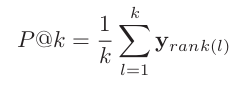

In [118]:
def evaluate_score(df_predicted_labels,df_actual_labels,top_k):
    
    final_shape = min(df_predicted_labels[0].shape[0],df_actual_labels[0].shape[0])
#     print(final_shape)
    
    get_score = 0

    for iteration in range(final_shape):
        
        # get Predicted Label
        predicted_label = df_predicted_labels[0][iteration]
        predicted_label_list = predicted_label.split(' ')
        
        # get Actual Label 
        actual_label = df_actual_labels[0][iteration]
        actual_label_list = actual_label.split(' ')
#         if iteration>1000:
#             break
        get_score = get_score + \
        calculate_top_k_score(predicted_label_list,actual_label_list,top_k) 
    
    return get_score

In [119]:
def evaluate_precision(df_predicted_labels,df_actual_labels,top_k):

    final_shape = min(df_predicted_labels[0].shape[0],df_actual_labels[0].shape[0])
#     print(final_shape)
    
    get_score = evaluate_score(df_predicted_labels,df_actual_labels,top_k)
        
    final_score = (get_score) 
    
    return final_score

In [127]:
for k in [1,2,3,4,5,10,15,50]:
    
    debug_flag = False
    
    final_shape = min(df_predicted_labels[0].shape[0],df_actual_labels[0].shape[0])
#     print(final_shape)

    precision_value = 0
    
#     for index_k in range(k):
    precision_value = \
    evaluate_precision(df_predicted_labels,df_actual_labels,k)
        
    precision_value =  precision_value / (k * final_shape)
    
    print(" Value of K ",k)
    print(" Value of precision_value ",precision_value)

 Value of K  1
 Value of precision_value  0.2095730918499353
 Value of K  2
 Value of precision_value  0.22652005174644244
 Value of K  3
 Value of precision_value  0.23458387235877534
 Value of K  4
 Value of precision_value  0.22509702457956016
 Value of K  5
 Value of precision_value  0.22473479948253558
 Value of K  10
 Value of precision_value  0.19971539456662354
 Value of K  15
 Value of precision_value  0.17845623113410952
 Value of K  50
 Value of precision_value  0.06267011642949548


# Getting DCG 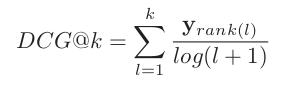

In [121]:
def evaluate_dcn(df_predicted_labels,df_actual_labels,top_k):

    final_shape = min(df_predicted_labels[0].shape[0],df_actual_labels[0].shape[0])
#     print(final_shape)
    
    get_dcn_score = 0

    for iteration in range(final_shape):
        
        # get Predicted Label
        predicted_label = df_predicted_labels[0][iteration]
        predicted_label_list = predicted_label.split(' ')
        
        # get Actual Label 
        actual_label = df_actual_labels[0][iteration]
        actual_label_list = actual_label.split(' ')

        get_dcn_score = get_dcn_score + \
        (calculate_top_k_score_dcn(predicted_label_list,actual_label_list,top_k))
    
    return get_dcn_score

In [122]:
for k in [1,3,5,10,15,50]:
    debug_flag = False
    
    final_shape = min(df_predicted_labels[0].shape[0],df_actual_labels[0].shape[0])
#     print(final_shape)

    dcn_value = 0

    dcn_value = dcn_value + evaluate_dcn(df_predicted_labels,df_actual_labels,k)
    
    print(" Value of K ",k)
    print(" Value of dcn_value ",dcn_value)

 Value of K  1
 Value of dcn_value  810.0
 Value of K  3
 Value of dcn_value  1888.2048981107719
 Value of K  5
 Value of dcn_value  2549.3730548899107
 Value of K  10
 Value of dcn_value  3630.7778292807034
 Value of K  15
 Value of dcn_value  4325.832078788619
 Value of K  50
 Value of dcn_value  4743.039596046979


# Getting DCGi 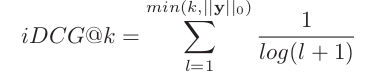

In [123]:
def evaluate_dcn_i(df_predicted_labels,df_actual_labels,top_k):

    final_shape = min(df_predicted_labels[0].shape[0],df_actual_labels[0].shape[0])    
    get_dcn_score = 0
    for iteration in range(final_shape):
        # get Predicted Label
        predicted_label = df_predicted_labels[0][iteration]
        predicted_label_list = predicted_label.split(' ')
        
        # get Actual Label 
        actual_label = df_actual_labels[0][iteration]
        actual_label_list = actual_label.split(' ')
        
        get_dcn_score = get_dcn_score + \
        calculate_top_k_score_i_dcn(predicted_label_list,actual_label_list,top_k)
        
    return get_dcn_score

In [124]:
for k in [1,3,5,10,15,50]:
    debug_flag = False
    
    final_shape = min(df_predicted_labels[0].shape[0],df_actual_labels[0].shape[0])
#     print(final_shape)

    dcn_value = 0
    dcn_value = dcn_value + evaluate_dcn_i(df_predicted_labels,df_actual_labels,k)
    
    print(" Value of K ",k)
    print(" Value of dcn_value ",dcn_value)

 Value of K  1
 Value of dcn_value  3865.0
 Value of K  3
 Value of dcn_value  8236.043497554165
 Value of K  5
 Value of dcn_value  11395.794494468631
 Value of K  10
 Value of dcn_value  17560.85684171099
 Value of K  15
 Value of dcn_value  22653.860012322184
 Value of K  50
 Value of dcn_value  27204.344975569726


# Get nDCG  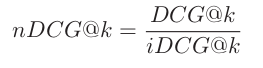

In [125]:
def evaluate_n_dcn_k(df_predicted_labels,df_actual_labels,top_k):
    dcn_score = evaluate_dcn(df_predicted_labels,df_actual_labels,top_k)
    dcn_score_i = evaluate_dcn_i(df_predicted_labels,df_actual_labels,top_k)
    return (dcn_score/dcn_score_i)

In [126]:
for k in [1,3,5,10,15,50]:
    debug_flag = False
    
    final_shape = min(df_predicted_labels[0].shape[0],df_actual_labels[0].shape[0])
#     print(final_shape)

    dcn_value = 0
    dcn_value = dcn_value + evaluate_n_dcn_k(df_predicted_labels,df_actual_labels,k)
    
    print(" Value of K ",k)
    print(" Value of dcn_value ",dcn_value)

 Value of K  1
 Value of dcn_value  0.2095730918499353
 Value of K  3
 Value of dcn_value  0.22926116146320827
 Value of K  5
 Value of dcn_value  0.2237117434968964
 Value of K  10
 Value of dcn_value  0.20675402470435203
 Value of K  15
 Value of dcn_value  0.19095342146705485
 Value of K  50
 Value of dcn_value  0.17434860498594482
